# Sentiment Analysis in Python

#### Using 2 different techniques:

1. VADER (Valence Aware Dictionary & sEntiment Reasoner) - Bag of words approach -> traditional method
2. Roberta Pretrained Model
3. Huggingface Pipeline -> advanced transformer model

## Step 0: Read data & NLTK Basic
NLTK = Natural Language Tool Kit

- Data source from *Amazon Fine Food Reviews*, which contains text reviews for food on Amazon & reviewers' ratings out of 5 stars found in the 'Score' column

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set a style sheet
plt.style.use('ggplot')

import nltk 

C:\Users\Kai Lin\Documents\PythonDownload\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read data
df = pd.read_csv('Amazon Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# see 'Text' col from the 1st row (start from 0)
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [4]:
# shape of dataset
print(df.shape)

# 568454 rows, 10 cols

(568454, 10)


In [5]:
# given a large reviews, reduce data to 1st 500 reviews
df = df.head(500)
print(df.shape)

(500, 10)


In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Exploratory Data Analysis (EDA)

In [7]:
# 'Score' col is reviewers rating - from 1 to 5 stars

# count the occurences of each score ratings
rating = df['Score'].value_counts().sort_index() # sort index in asc order
rating

1     36
2     18
3     37
4     70
5    339
Name: Score, dtype: int64

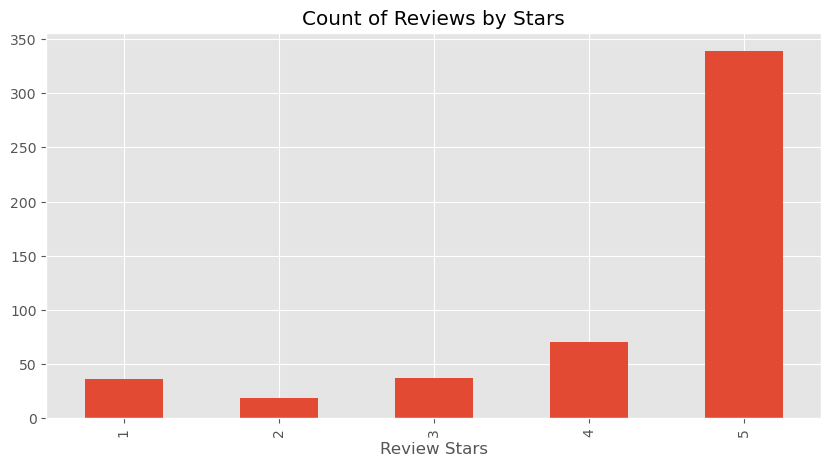

In [8]:
# plot a bar chart of 'Score'
ax = rating.plot(kind='bar', title='Count of Reviews by Stars',
           figsize=(10, 5))

ax.set_xlabel('Review Stars')
plt.show()

- Majority of the reviews are 5 stars, biased towards positive reviews

## Basic NLTK

In [9]:
# pick the 50th value found in 'Text' col 
# seems to be negative review 

example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [10]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\Kai
[nltk_data]     Lin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kai Lin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Kai
[nltk_data]     Lin\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Kai
[nltk_data]     Lin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Kai
[nltk_data]     Lin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# tokenize = break down (split) text in words
tokens = nltk.word_tokenize(example)

# show the 1st 10 tokens
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [12]:
# part of speech (POS) tagging
tagged = nltk.pos_tag(tokens)

# each token, accompanied by POS-tag values (codes)
# NN = noun

# show the 1st 10
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [13]:
# put tag POS into entities, group them into chunks of text
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint() # pretty print

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## Step 1: VADER Sentiment Scoring

Use NLTK's *SentimentIntensityAnalyzer* to get the **negative/neutral/positive scores** of the text


- "Bag of words" approach is used, where:
1. Stop words such as "a", "an", "the", "and", "or" are removed
2. Each word is scored individually & combined to a total score

Cons:
- This approach does not account for r/s between words -> missing out on context for human language

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 
# add progress bar tracker to loops

In [15]:
# create sentiment intensity analyzer (sia) object
sia = SentimentIntensityAnalyzer()
sia

In [16]:
# run sia object on text
sia.polarity_scores('I am so happy!')

# compound score = aggregation of neg, neu & pos values
# compound score ranges from -1 (neg) to 1 (pos)

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [17]:
sia.polarity_scores('This is the worst thing ever.')

# polarity score is mostly neg & neu
# compound score is -0.62

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [18]:
sia.polarity_scores(example) # oatmeal comment

# high neutral score
# overall compound score is neg(-ve)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [19]:
# Run the polarity score on the entire dataset, all the text col

result = {} # store polarity scores in dictionary

for i, row in tqdm(df.iterrows(), total=len(df)): # iterate each row (row, col)
    text = row['Text']
    myid = row['Id']
    result[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
len(df)

500

In [21]:
# result dictionary, with each id associated with polarity score (pos, neu, neg & compound)

# convert dictionary to df
pd.DataFrame(result)

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0550,0.0000,0.0560,0.1000,0.0000,0.0000,0.0590,0.0250,0.041,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.7040,0.7170,0.8550,0.6450,0.7880,0.5540,0.7990,0.7620,0.904,0.6780
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.2410,0.2830,0.0890,0.2540,0.2120,0.4460,0.1420,0.2120,0.055,0.3220
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9287,0.9367,0.5976,0.6486,0.9743,0.9725,0.7833,0.9848,0.128,0.9811


In [22]:
# add T to flip horizontally
vaders = pd.DataFrame(result).T

# reset index to merge this df to original df, create a col where index = Id
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [23]:
# left merge
vaders = vaders.merge(df, how='left')
vaders.head() # new df has sentiment scores & metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


- Assume if 'Score' is 5 stars reviews, the text has a more positive sentiment
- Assume that a 1 star review have negative connotaction than a 5 stars review

## Plot VADER results

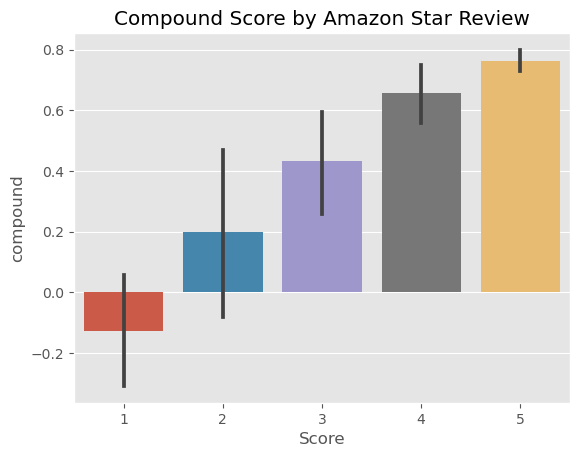

In [24]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

- 1 star review has lower compound score ranging from-0.2 to 0.
- The more positive the compound score, more positive sentiment derived from text, as supported by higher stars reviews

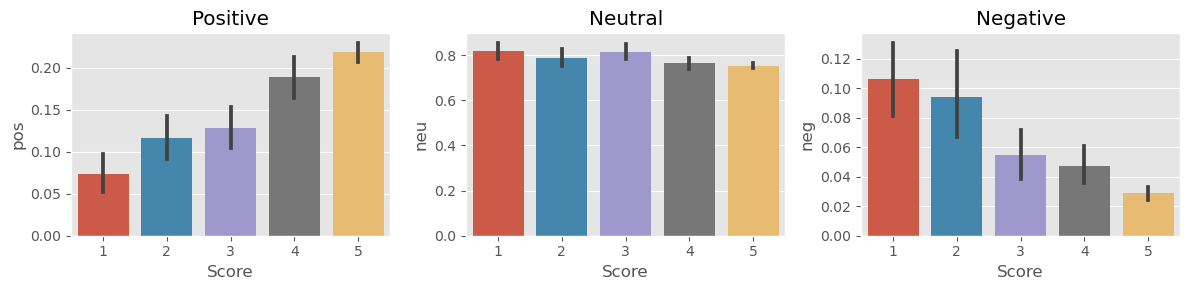

In [25]:
# make pos, neu, neg side by side (1 by 3 grid)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

- positive polarity scores are higher with higher score in terms of stars rating
- neutral polarity scores are relatively flat
- negative polarity scores goes down as the star reviews become higher

## Step 3: Roberta Pretrained Model
- Use a model trained of large corpus (doc) of data
- Transformer model accounts for the words & context related to other words
- Pros: DL able to pick up on context

In [49]:
# pip install transformers

In [50]:
# pip install tensorflow

In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
# model from hugging face
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [28]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [29]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt') # 'pt' for PyTorch
encoded_text

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [30]:
output = model(**encoded_text)

# make output into numpy
scores = output[0][0].detach().numpy()
scores = softmax(scores)
# neg, neu, pos scores for this array containing 3 values

# store in dict {key: value}
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573692}


- Roberta model is more negative compared to VADER model
- Roberta model is more powerful than VADER model, able to consider context

In [31]:
# run this Roberta function on the entire dataset
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [32]:
# iterate over each row in the entire dataset
# Run the polarity score on the entire dataset, all the text col

result = {} # store polarity scores in dictionary
for i, row in tqdm(df.iterrows(), total=len(df)): # iterate each row (row, col)
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)

        vader_result_rename = {} # empty dict
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result} # combine both results
        result[myid] = both # store into dict
    except RuntimeError:
        print(f'Broke for id {myid}')    
        
# slow bcos running on CPU, should be optimized to run on GPU

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [33]:
roberta_result

{'roberta_neg': 0.0024397583,
 'roberta_neu': 0.01132722,
 'roberta_pos': 0.986233}

In [34]:
# combine vader result tgt with roberta result
{**vader_result, **roberta_result}

{'neg': 0.0,
 'neu': 0.678,
 'pos': 0.322,
 'compound': 0.9811,
 'roberta_neg': 0.0024397583,
 'roberta_neu': 0.01132722,
 'roberta_pos': 0.986233}

In [35]:
results_df = pd.DataFrame(result).T # flip the df
results_df = results_df.reset_index().rename(columns={'index': 'Id'}) # change index of df to create new col 'Id'
results_df = results_df.merge(df, how='left') # left merge with original df

results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Compare Scores between models

In [36]:
# variables / features to look at
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Step 3: Combine and compare 

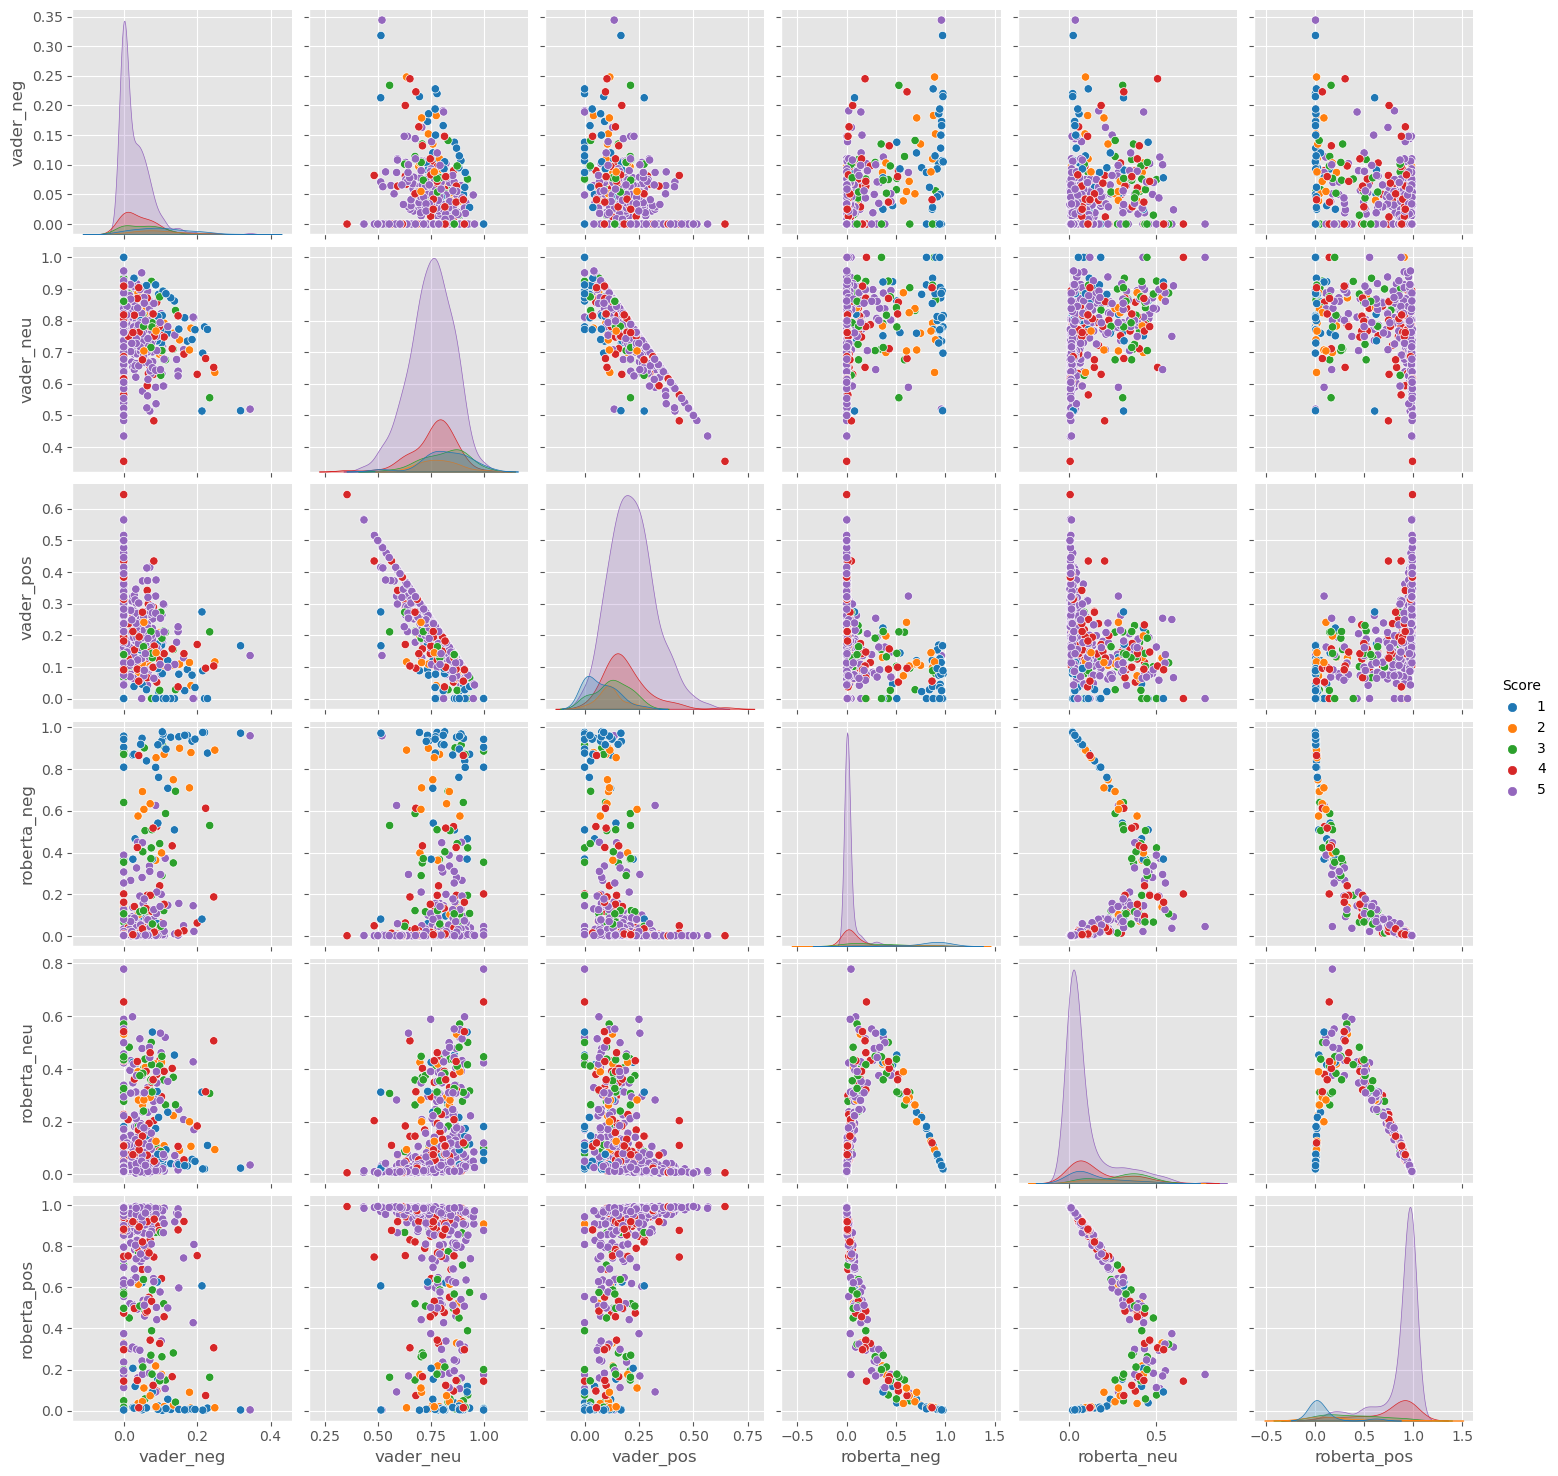

In [37]:
# compare between each observation / features
sns.pairplot(data=results_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score', # color by 'Score' 1-5 stars ratings
            palette='tab10')
plt.show()

- Vader_pos are more towards the right (long tail), skewed towards the right
- More correlation found in the Vader model, as compared to roberta model
- Roberta model has clear seperation for its model's positive, neutral & negative scores

## Step 4: Review Examples:
- Positive 1 Star & Negative 5 Star Reviews

### Positive Sentiment, 1 star review

In [38]:
# 1 star review, sort in descending order 
# highest roberta positive score with 1 star review appearing @ the top

results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

# find text found positive by roberta model, but rated 1 star score by reviewer
# started off positive, ended off negative

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [39]:
# most positive vader_pos score by model, but rated 1 star by reviewer

results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0] # top

# negative sarcastic review (not picked up by model), but contains positive words 
# vader model uses bags of words approach

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

### Negative Sentiment, 5 stars review

In [40]:
# Roberta Model

results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

# negative sentiment but positive review

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [41]:
# Vader Model

results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Hugging Face Transformer Pipeline
- Quick & easy way to run sentiment predictions

In [42]:
from transformers import pipeline

In [44]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

C:\Users\Kai Lin\Documents\PythonDownload\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Kai Lin\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [45]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [48]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [46]:
# pip uninstall keras

In [47]:
# pip install tf-keras

## Data Preprocessing
- Clean text by removing characters, stop words, and perform tokenization (split text into individual words)

In [58]:
import re
from nltk.corpus import stopwords

In [54]:
# Define a function to clean the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [60]:
# Apply the cleaning function to the text column
results_df['clean_text'] = results_df['Text'].apply(clean_text)
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


### Roberta Model Sentiment Label

In [62]:
# Function to determine roberta_label
def determine_roberta_label(row):
    if row['roberta_neg'] > row['roberta_neu'] and row['roberta_neg'] > row['roberta_pos']:
        return 'Negative'
    elif row['roberta_neu'] > row['roberta_neg'] and row['roberta_neu'] > row['roberta_pos']:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to each row to create the new column
results_df['roberta_label'] = results_df.apply(determine_roberta_label, axis=1) # col-wise
results_df['roberta_label'].value_counts()

Positive    399
Negative     64
Neutral      35
Name: roberta_label, dtype: int64

In [66]:
# group by positive, neutral, negative sentiment labels - Roberta Model
pos_text = results_df[results_df['roberta_label'] == 'Positive']
neu_text = results_df[results_df['roberta_label'] == 'Neutral']
neg_text = results_df[results_df['roberta_label'] == 'Negative']

In [69]:
pos_text

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text,roberta_label
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,Positive
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...,Positive
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,Positive
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,Positive
5,6,0.029,0.809,0.163,0.8830,0.006130,0.021796,0.972075,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair taffy ordered five pound bag taf...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,495,0.000,0.788,0.212,0.9743,0.004486,0.027289,0.968225,B000G6RYNE,A2C5BWOM7329UD,Jason T. Stevens,0,0,5,1203465600,Addictive,These are the best potato chips I've ever tast...,best potato chips ever tasted easy half bag wi...,Positive
493,496,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...,rarely eat chips saw tried really amazing love...,Positive
494,497,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...,easily best potato chip ever look ingredients ...,Positive
495,498,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,kettle chips spicy thai potato chips perfect a...,Positive


## Word Cloud Analysis

In [67]:
from wordcloud import WordCloud

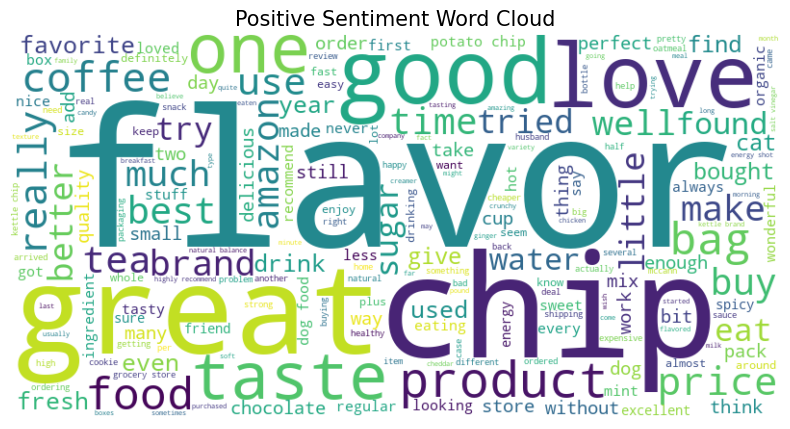

In [74]:
# Define the function to generate a word cloud 
def generate_word_cloud(dataframe, column, title):
    # Combine all the text from the specified column into one string
    text = " ".join(review for review in dataframe[column])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=15)
    plt.show()

# Example usage: Positive sentiment from Roberta Model
generate_word_cloud(pos_text, 'clean_text', 'Positive Sentiment Word Cloud') 

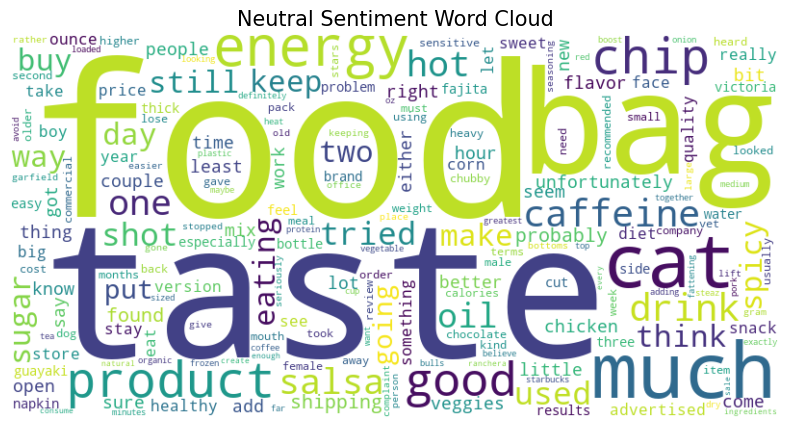

In [75]:
# Neutral sentiment from Roberta Model
generate_word_cloud(neu_text, 'clean_text', 'Neutral Sentiment Word Cloud') 

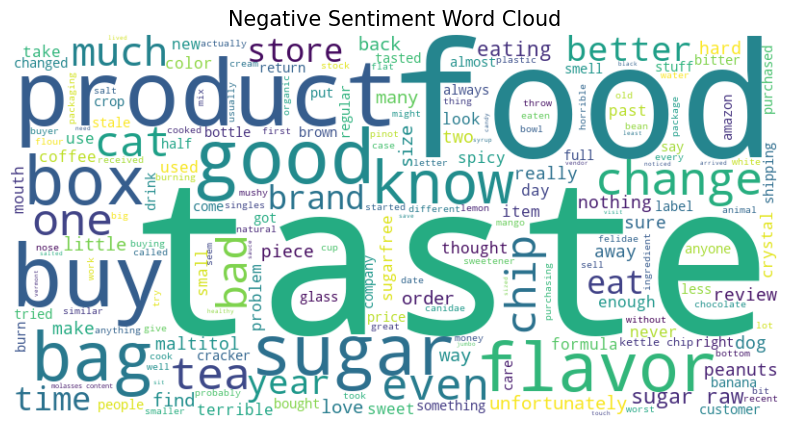

In [76]:
# Negative sentiment from Roberta Model
generate_word_cloud(neg_text, 'clean_text', 'Negative Sentiment Word Cloud') 